In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [2]:
#pip install scikit-learn

In [2]:
data = pd.read_csv("dataset-stroke-data.csv")
pd.options.display.max_rows


data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
#Changing the object type data to category for encoding purposes

In [3]:
for label, content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        data[label] = pd.Categorical(content)
        

In [4]:
#Checking data types for change
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   category
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   int64   
 4   heart_disease      5110 non-null   int64   
 5   ever_married       5110 non-null   category
 6   work_type          5110 non-null   category
 7   Residence_type     5110 non-null   category
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                4909 non-null   float64 
 10  smoking_status     5110 non-null   category
 11  stroke             5110 non-null   int64   
dtypes: category(5), float64(3), int64(4)
memory usage: 305.3 KB


In [5]:
data.select_dtypes(include="category").columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [6]:
labels = ['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status']

In [7]:
#Using OneHotEncoder to encode category types into int for predictive modeling
ohe = OneHotEncoder()

cat_columns = data[labels]
enc_columns = ohe.fit_transform(cat_columns).toarray()
enc_features = ohe.get_feature_names_out(labels)

enc_data = pd.DataFrame(enc_columns, columns=enc_features)

In [8]:
# Calling new encoded DataFrame

enc_data.head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [9]:
#Joining end DataFrame with original DF. Then dropping original columns

data_join = enc_data.join(data)
data_join.head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,...,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [10]:
#Changing stroke column title to target

data_join.rename(columns={"stroke": "target"}, inplace=True)

data_join.head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,...,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,target
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
data_join.drop(["gender", "ever_married", "work_type",
       "Residence_type", "smoking_status"], axis=1, inplace=True)

In [12]:
data_join.head(10)

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,...,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,id,age,hypertension,heart_disease,avg_glucose_level,bmi,target
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,9046,67.0,0,1,228.69,36.6,1
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,51676,61.0,0,0,202.21,NaN,1
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,31112,80.0,0,1,105.92,32.5,1
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,60182,49.0,0,0,171.23,34.4,1
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1665,79.0,1,0,174.12,24.0,1
5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,56669,81.0,0,0,186.21,29.0,1
6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,53882,74.0,1,1,70.09,27.4,1
7,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,10434,69.0,0,0,94.39,22.8,1
8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,27419,59.0,0,0,76.15,NaN,1
9,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,60491,78.0,0,0,58.57,24.2,1


In [13]:
#Checking for missing values or null values
data_join.isna().sum()

gender_Female                       0
gender_Male                         0
gender_Other                        0
ever_married_No                     0
ever_married_Yes                    0
work_type_Govt_job                  0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
Residence_type_Rural                0
Residence_type_Urban                0
smoking_status_Unknown              0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
id                                  0
age                                 0
hypertension                        0
heart_disease                       0
avg_glucose_level                   0
bmi                               201
target                              0
dtype: int64

In [14]:
data_join.bmi.isnull().value_counts()  #This command displays the 201 null values

bmi
False    4909
True      201
Name: count, dtype: int64

In [15]:
#Filling missing values with mean using `SimpleImputer'
imputer = SimpleImputer(strategy='mean', missing_values=np.NaN)

imputer_bmi = imputer.fit_transform(data_join[['bmi']])
data_join['bmi'] = imputer_bmi

In [17]:
#data_join.isna().sum()

In [ ]:
#Handling the imbalance of the target column by using synthetic data techniques

In [7]:
#!pip install imbalanced-learn
#from imblearn.over_sampling import SMOTE


#from imblearn.under_sampling import RandomUnderSampler
#under = RandomUnderSampler(sampling_strategy=1)

In [18]:
data_join['target'].value_counts()

target
0    4861
1     249
Name: count, dtype: int64

<Axes: xlabel='target'>

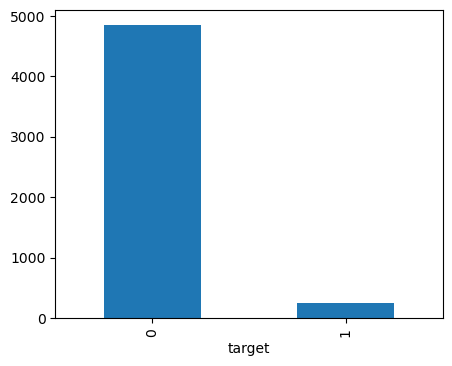

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))

data_join.target.value_counts().plot(kind='bar')

In [20]:
X = data_join.drop('target', axis = 1)
y = data_join['target']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
#pip install --upgrade pip
!pip install imblearn

In [23]:
#!pip install -U imbalanced-learn
#!pip install -U scikit-learn

from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(sampling_strategy=1)

X, y = under.fit_resample(X_train, y_train)

In [22]:
import imblearn
#from imblearn.over_sampling import SMOTE

# transform the dataset
#oversample = SMOTE()
#X, y = oversample.fit_resample(X, y)

In [ ]:
#Using `BalancedRandomClassifier' model

#clf = BalancedRandomForestClassifier(n_estimators=100, min_samples_split=2,
#   sampling_strategy="all", replacement=True, max_depth=2)  #Change max_depth=4
#clf.fit(X, y)
#clf.score(X_test, y_test)

In [62]:
#pip list

In [24]:
y.value_counts()

target
0    206
1    206
Name: count, dtype: int64

<Axes: xlabel='target'>

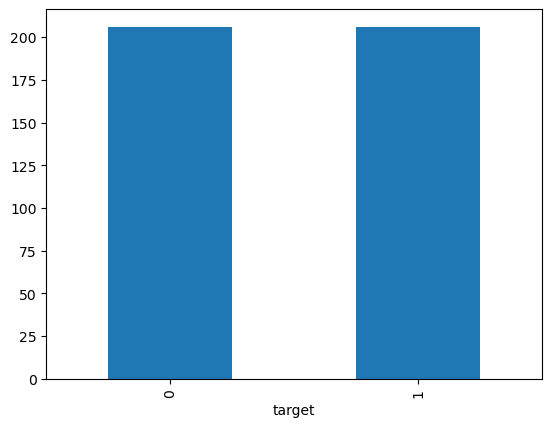

In [25]:
y.value_counts().plot(kind='bar')

In [ ]:
#Using standard RandomForsest model

#clf = RandomForestClassifier(n_estimators=100, min_samples_split=3,
#    max_depth=4, random_state=0)
#clf.fit(X, y)
#clf.score(X_test, y_test)

In [26]:
#Importing the proper models
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier # The k-nearest neighbor classifier
from sklearn.feature_selection import VarianceThreshold # Feature selector
from sklearn.pipeline import Pipeline # For setting up pipeline
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV # For optimization

In [27]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', VarianceThreshold()),  #VarianceThreshold() for discarding features whose variance is less than a certain defined threshold.
    ('classifier', KNeighborsClassifier())
])

In [28]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('selector', VarianceThreshold()),
                ('classifier', KNeighborsClassifier())])

In [29]:
print('Training set score: ' + str(pipe.score(X_train, y_train)))
print()
print('Test set score: ' + str(pipe.score(X_test, y_test)))

Training set score: 0.9527886497064579

Test set score: 0.9559686888454012


In [30]:
#Setting parameters for hypertuning
params = {'scaler': [StandardScaler(), MinMaxScaler(), MaxAbsScaler()],
                    'selector__threshold': [0, 0.001, 0.01],
                      'classifier__n_neighbors': [1,3,5,7,10],  #Alt methdod: np.arrange(1, 10, 2)
                      'classifier__p': [1,2],
                      'classifier__leaf_size': [1,5,10,15]}

In [31]:
grid = GridSearchCV(estimator=pipe, param_grid=params, cv=3, n_jobs=-1,verbose=True).fit(X_train, y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


In [32]:
print('Training score: ' + str(grid.score(X_train, y_train)))

print('Test score: ' + str(grid.score(X_test, y_test)))

Training score: 0.951320939334638
Test score: 0.9579256360078278


In [33]:
grid.best_score_

0.9503427590731768

In [34]:
grid.best_params_

{'classifier__leaf_size': 1,
 'classifier__n_neighbors': 7,
 'classifier__p': 1,
 'scaler': StandardScaler(),
 'selector__threshold': 0}

In [35]:
#Storing optimal parameters for later use

edited_params = {'classifier__leaf_size': [1],
 'classifier__n_neighbors': [7],
 'classifier__p': [1],
 'scaler': [StandardScaler()],
 'selector__threshold': [0]}

In [36]:
grid_2 = GridSearchCV(estimator=pipe, param_grid=edited_params, cv=3, n_jobs=-1).fit(X_train, y_train)

In [37]:
print('Test score: ' + str(grid.score(X_test, y_test))) #Edited params did not result in higher score

Test score: 0.9579256360078278


In [38]:
#construct a DataFrame from the grid.cv_results_

results_df = pd.DataFrame.from_dict(grid.cv_results_)
results_df.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__leaf_size,param_classifier__n_neighbors,param_classifier__p,param_scaler,param_selector__threshold,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
234,0.004202,0.001798,0.063962,0.007311,10,7,1,StandardScaler(),0,"{'classifier__leaf_size': 10, 'classifier__n_n...",0.950110,0.949376,0.951542,0.950343,0.000899,1
236,0.002307,0.000260,0.059976,0.003399,10,7,1,StandardScaler(),0.01,"{'classifier__leaf_size': 10, 'classifier__n_n...",0.950110,0.949376,0.951542,0.950343,0.000899,1
144,0.002544,0.000715,0.066626,0.001859,5,7,1,StandardScaler(),0,"{'classifier__leaf_size': 5, 'classifier__n_ne...",0.950110,0.949376,0.951542,0.950343,0.000899,1
145,0.003631,0.002062,0.065209,0.005660,5,7,1,StandardScaler(),0.001,"{'classifier__leaf_size': 5, 'classifier__n_ne...",0.950110,0.949376,0.951542,0.950343,0.000899,1
146,0.002122,0.000049,0.062064,0.005517,5,7,1,StandardScaler(),0.01,"{'classifier__leaf_size': 5, 'classifier__n_ne...",0.950110,0.949376,0.951542,0.950343,0.000899,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.002103,0.000116,0.026660,0.000859,10,1,2,StandardScaler(),0.001,"{'classifier__leaf_size': 10, 'classifier__n_n...",0.909024,0.906090,0.914831,0.909982,0.003632,349
189,0.002173,0.000060,0.035974,0.006031,10,1,2,StandardScaler(),0,"{'classifier__leaf_size': 10, 'classifier__n_n...",0.909024,0.906090,0.914831,0.909982,0.003632,349
280,0.002200,0.000093,0.032398,0.001244,15,1,2,StandardScaler(),0.001,"{'classifier__leaf_size': 15, 'classifier__n_n...",0.909024,0.906090,0.914831,0.909982,0.003632,349
279,0.002162,0.000111,0.028738,0.002762,15,1,2,StandardScaler(),0,"{'classifier__leaf_size': 15, 'classifier__n_n...",0.909024,0.906090,0.914831,0.909982,0.003632,349


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


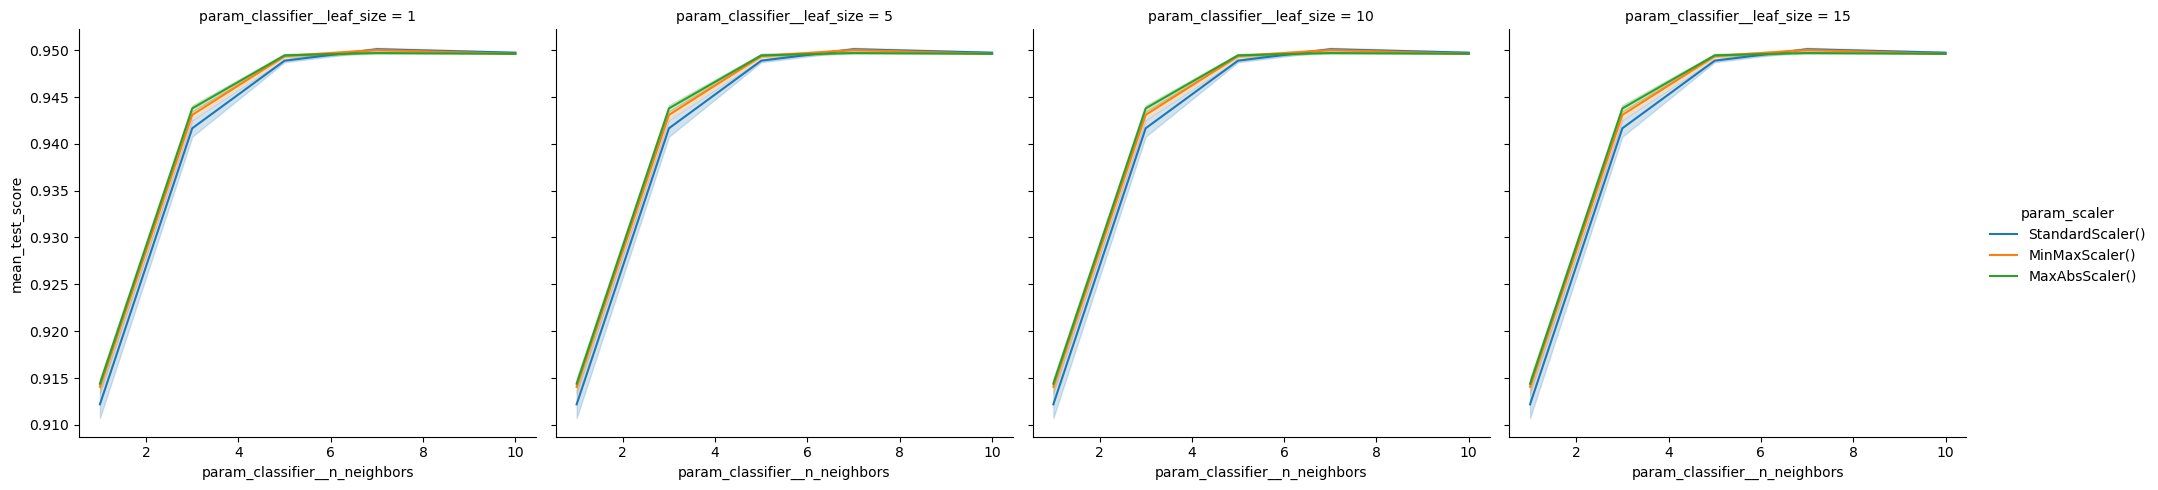

In [39]:
#sns.relplot with leaf_size as the column

sns.relplot(data=results_df, kind='line',        #param_ needed in front of model Ex: "param_classifier"
           x='param_classifier__n_neighbors', y='mean_test_score',
           hue='param_scaler',
           col='param_classifier__leaf_size');  #Can use columns from created dataframe for things like `hue`

In [51]:
#Corelation heatmap
import seaborn as sns

<Axes: >

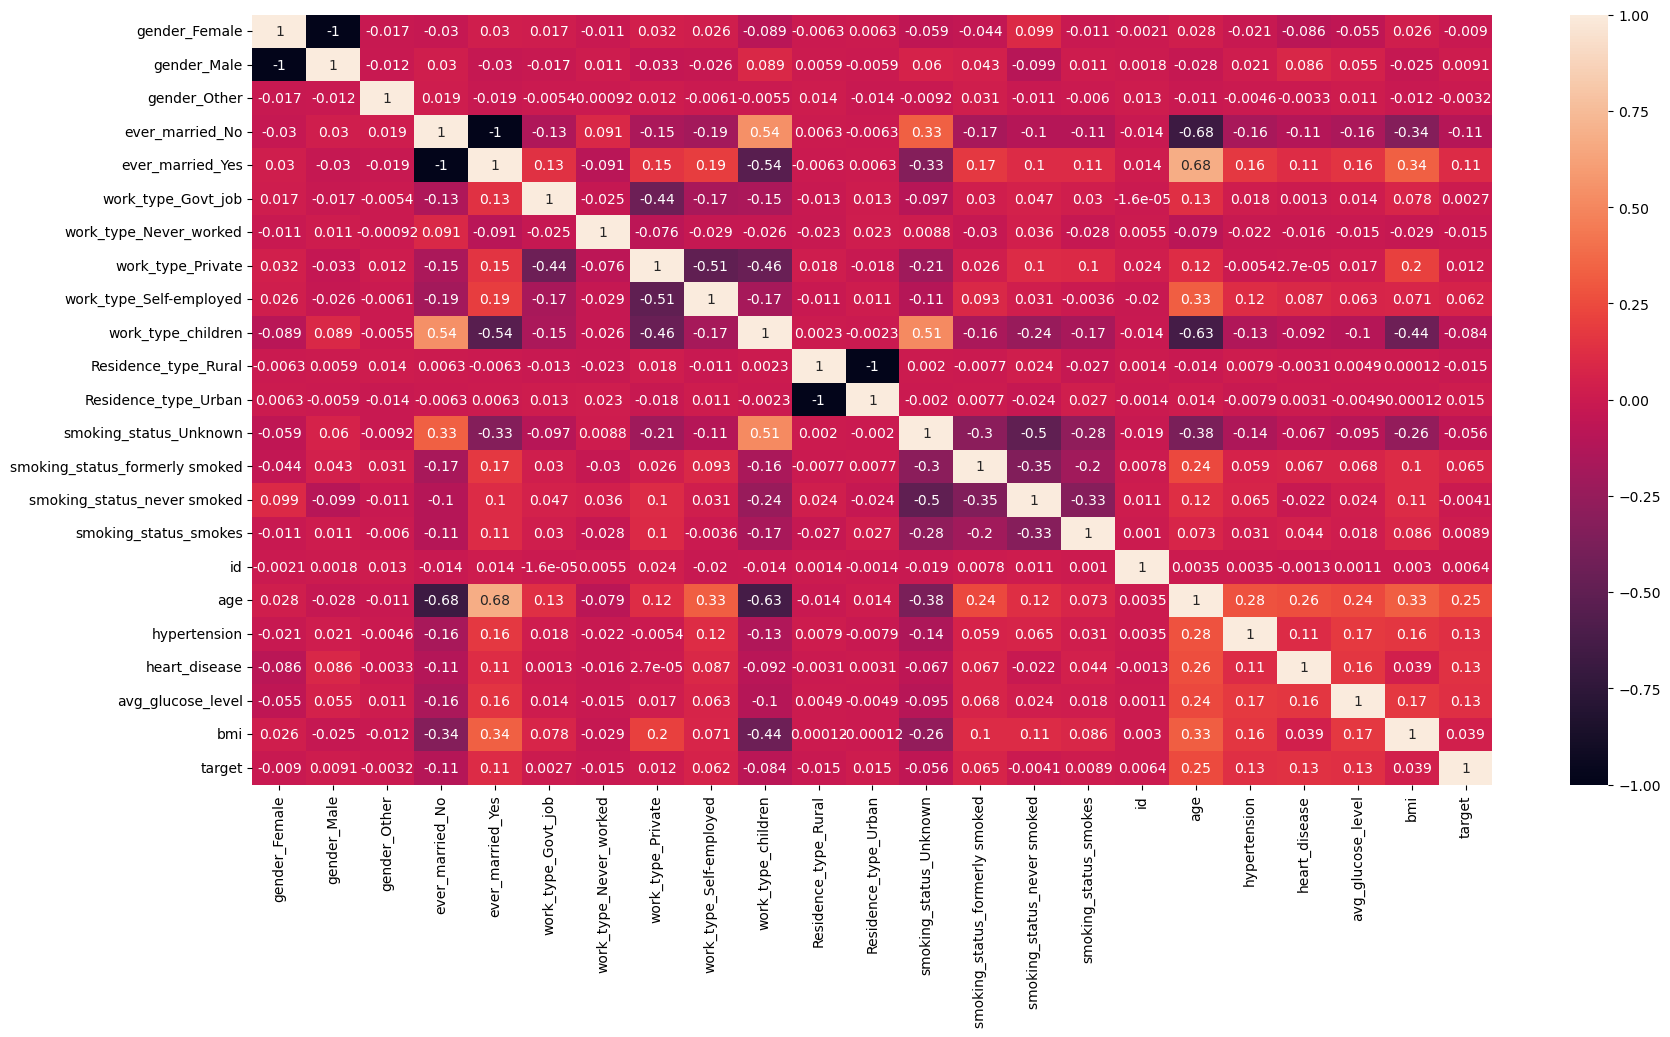

In [56]:
# finding the collinearity using heatmap
plt.figure(figsize = (20,10))
sns.heatmap(data_join.corr(),annot = True)

In [ ]:
#Obtaining Classification Report and Cross_value Score

In [41]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report

In [42]:
cv = KFold(n_splits=5, shuffle=True, random_state=1)

In [43]:
scores = cross_val_score(grid_2, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [44]:
scores

array([0.95232274, 0.94498778, 0.95721271, 0.96450428, 0.93023256])

In [50]:
print("Accuracy: %.3f" % np.mean(scores))

Accuracy: 0.950


In [57]:
y_pred = grid_2.predict(X_test)

In [67]:
#Classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       979
           1       0.50      0.02      0.04        43

    accuracy                           0.96      1022
   macro avg       0.73      0.51      0.51      1022
weighted avg       0.94      0.96      0.94      1022



In [ ]:
#ROC Curve with optimal threshold

In [63]:
y_pred_proba = grid_2.predict_proba(X_test)


In [65]:
#Keep probabilites for the positive outcome only

y_proba_pos = y_pred_proba[:, 1]
#y_proba_pos

In [68]:
from numpy import sqrt
from numpy import argmax
from sklearn.metrics import roc_curve
from matplotlib import pyplot

Best Threshold=0.142857, G-Mean=0.714


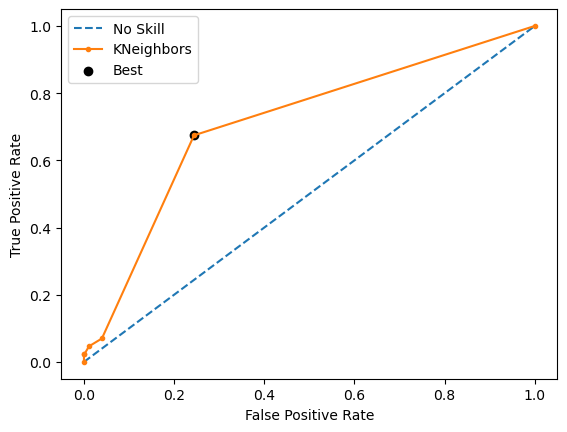

In [70]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_proba_pos)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='KNeighbors')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
#Assembling Confusion matrix for count of TP(True positives), TN(True negatives), FP(False positives), FN(False negatives)

In [126]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

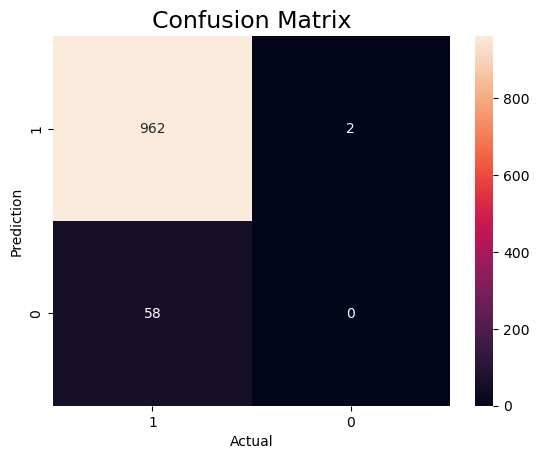

In [127]:
#Plot the confusion matrix.   # 1 = "At Risk", 0 = "Not at Risk"
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['1','0'],
            yticklabels=['1','0'])
plt.ylabel('Prediction',fontsize=10)
plt.xlabel('Actual',fontsize=10)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
#Feature Importance with ensemble method using both manual and using SHAP

In [123]:
#pip install shap

In [93]:
import xgboost
from xgboost import XGBClassifier


In [87]:
X1 = data_join.drop('target', axis = 1)
y1 = data_join['target']

In [98]:
model.fit(X1, y1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [99]:
# get importance
importance = model.feature_importances_


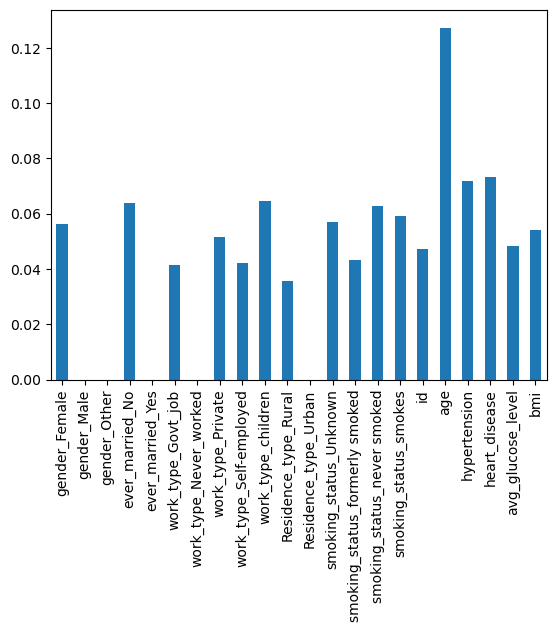

In [103]:
#Feature importance hardcode:
model = XGBClassifier()
model.fit(X1, y1)

pd.Series(model.feature_importances_, index=X1.columns).plot(kind='bar');



In [74]:
#Import SHAP
import shap

In [113]:
explainer = shap.Explainer(model)
shap_values = explainer(X1_test)

[21:32:12] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


NameError: name 'X1_test' is not defined

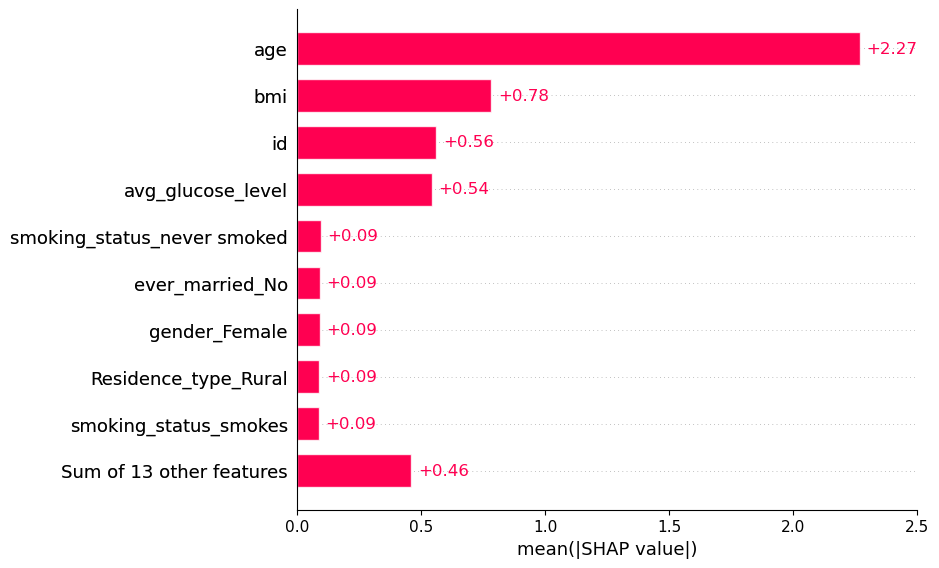

In [114]:
shap.plots.bar(shap_values, max_display=10) # default is max_display=12


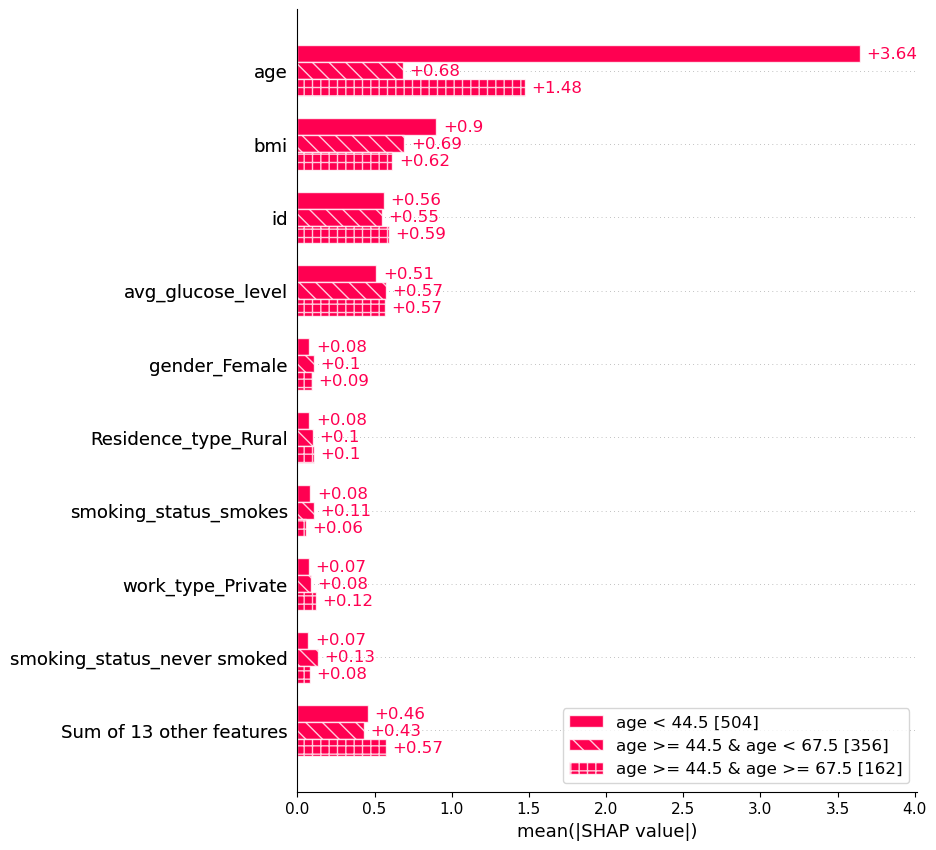

In [115]:
shap.plots.bar(shap_values.cohorts(3).abs.mean(0))


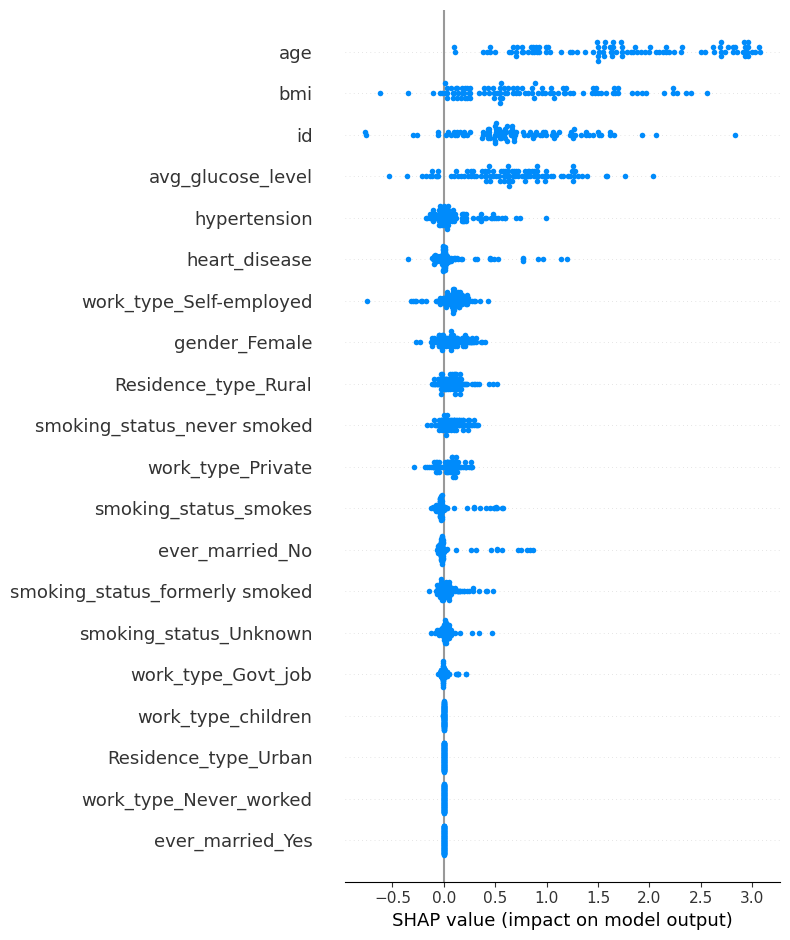

In [122]:
#explainer = shap.TreeExplainer(model)
#shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, features=X1.columns[:100])

In [117]:
x_train, x_test, y_train, y_test= train_test_split(X1, y1, test_size=0.2)

In [118]:
X1_test = data_join.drop('target', axis = 1)

The expected value is  -3.3335738


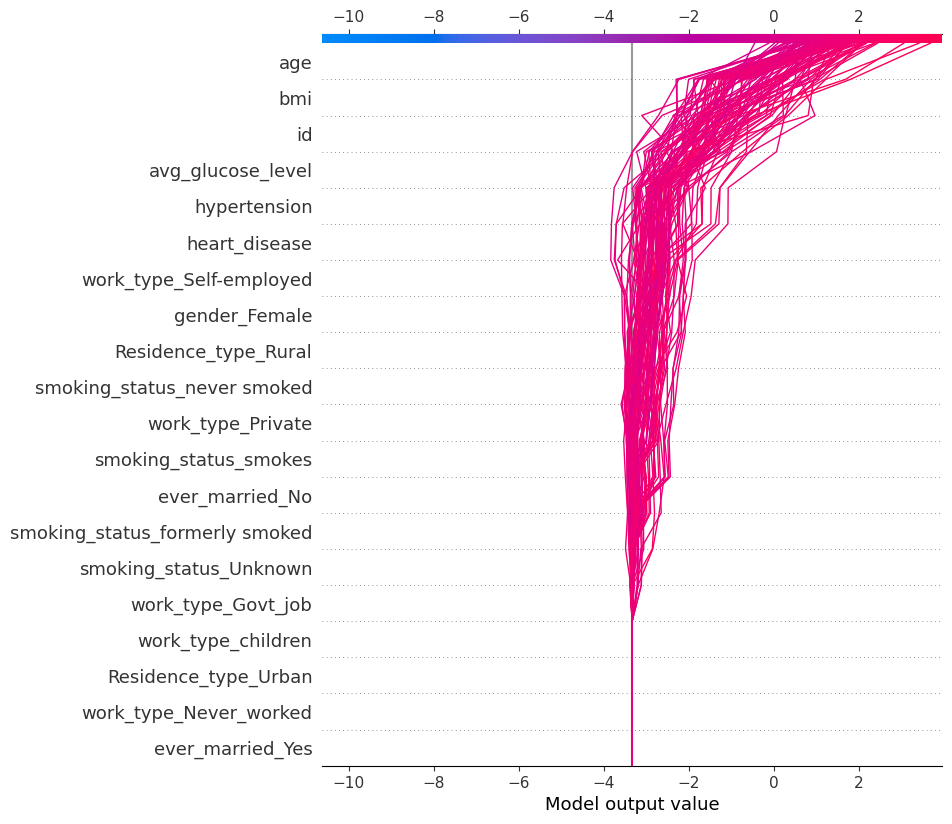

In [121]:
expected_value = explainer.expected_value
print("The expected value is ", expected_value)
shap_values = explainer.shap_values(X1_test)[:100]
shap.decision_plot(expected_value, shap_values, X1_test)